In [1]:
import cv2
from cv2 import imread, imshow
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.io
from skimage.io import imread as skimread
from skimage.io import imshow as skimshow

d:\Setups\IDEs\Anacondas\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
cap = cv2.VideoCapture('obj_vid3.mp4')

In [3]:
while True:

    ret, frame = cap.read()

    if not ret:
        break

    imshow('Frame', frame)

    if cv2.waitKey(30) & 0xFF == 27:
        break

print('Video End')

# cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

Video End


(120, 110, 3)


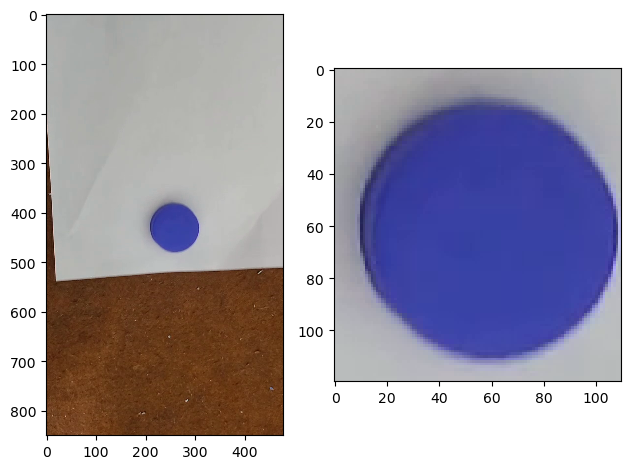

In [14]:
ball = frame[370:490, 200:310, :]
kheight, kwidth, _ = ball.shape

plt.subplot(121)
skimshow(frame)
plt.subplot(122)
skimshow(ball)

In [16]:
mean_image = np.mean(frame, axis=-1, keepdims=True)


In [17]:
def cal_hist(img):

    hist = cv2.calcHist([img], [0], None, [256], [0, 256]) # Calculate Histogram

    hist /= np.sum(hist) # Normalize histogram

    return hist

def compare_histograms(hist1, hist2):
    # Calculate Bhattacharyya coefficient
    bhattacharyya_coefficient = np.sum(np.sqrt(np.multiply(hist1, hist2)))
    
    return bhattacharyya_coefficient

In [18]:
def mark_object(image, obj, cal_hist=cal_hist, compare_histograms=compare_histograms):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    obj_hist = cal_hist(obj)
    
    max_coe = -1
    max_x = -1
    max_y = -1
    threshold = 0.99

    for i in range( gray.shape[0] - kheight + 1 ):
        for j in range( gray.shape[1] - kwidth + 1 ):
            
            img_area = gray[i : i+kheight, j : j+kwidth]

            img_hist = cal_hist(img_area)

            similarity = compare_histograms(img_hist, obj_hist)
            
            if similarity > max_coe and similarity > threshold:
                max_coe = similarity
                max_x = int(j)
                max_y = int(i)

    cv2.rectangle(image, (max_x, max_y), (max_x + int(kwidth), max_y + int(kheight)), (0, 255, 0), 2)  # (0, 255, 0) is the color, 2 is the thickness

In [19]:
def detect_object(video, object):
    
    new_video = []
    cap = cv2.VideoCapture(video)

    while True:

        ret, frame = cap.read()

        if not ret:
            break

        # frame = np.mean(frame, axis=-1, keepdims=True)

        mark_object(frame, object)
        new_video.append(frame)

        if cv2.waitKey(30) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

    return new_video
    

In [20]:
def play_video(video):

    if type(video) == str:
        cap = cv2.VideoCapture(video)
    else:
        cap = video

    while True:

        ret, frame = cap.read()

        if not ret:
            break

        imshow('Video', frame)

        if cv2.waitKey(30) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

In [22]:
def download(video_l):

    frames = np.array(video_l)

    # Set the video parameters (width, height) based on the first frame
    height, width, layers = frames[0].shape
    video_size = (width, height)

    # Choose the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can use other codecs like 'XVID' or 'MJPG'
    video = cv2.VideoWriter('output_video2.mp4', fourcc, 10, video_size)  # Adjust the frame rate (third parameter) if needed

    # Write frames to the video
    for frame in frames:
        video.write(frame)

    # Release the VideoWriter object
    video.release()

In [23]:
video = 'obj_vid3.mp4'
new_video = detect_object(video, ball)
download(new_video)
play_video('output_video2.mp4')